<a href="https://colab.research.google.com/github/Kavin4240/Rainfall-Prediction/blob/main/Rainfall_project_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A] Import dataset**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
df = pd.read_csv('/content/rainfall.csv')
print(df.head(4))

                    DIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   1977.6    571.0  


**B] 1] FIND AND REPLACE MISSING VALUES USING FORWARD FILLING**

In [38]:

 df[30:32].ffill(axis=1)

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
30,ANDAMAN & NICOBAR ISLANDS,1932,2.8,2.5,10.1,58.2,479.7,479.7,479.7,479.7,479.7,479.7,479.7,479.7,479.7,5.3,548.0,548.0,548.0
31,ANDAMAN & NICOBAR ISLANDS,1933,4.5,11.7,8.1,58.4,365.4,544.2,376.6,294.1,759.0,239.8,268.8,56.9,2987.5,16.2,431.9,1973.9,565.5


**3] FIND AND REPLACE MISSING VALUES USING INTERPOLATION**

In [39]:

# df[20:25].interpolate()
df=df.interpolate()
print(df.head(5))

                    DIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   

In [40]:
# Replace missing values with column mean
df.fillna(df.mean(), inplace=True)

<ipython-input-40-3d391f13d0df>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


**C] Minmax Normalization**

<Axes: ylabel='Frequency'>

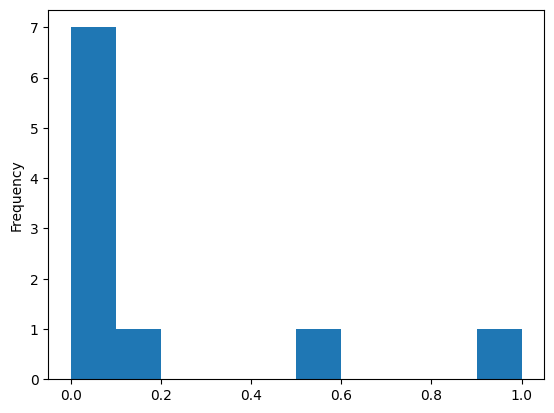

In [41]:
def minmax(x):
    return((x-min(x))/(max(x)-min(x)))

x = df['MAR'].head(10)
normalized_x = minmax(x)
normalized_x.plot(kind='hist')


**D] Scaling Function**

In [42]:
#Apply scaling function to normalize the data
from sklearn.preprocessing import StandardScaler
x1=df['MAY'].head(10)
scaler=StandardScaler()
a=np.array([])
for i in x1:
    x=np.append(a,i)
x=x.reshape(1,-1)
scaler.fit(x)
print(x)

[[327.3]]


**E] z-score Normalization**

<Axes: xlabel='MAR', ylabel='Count'>

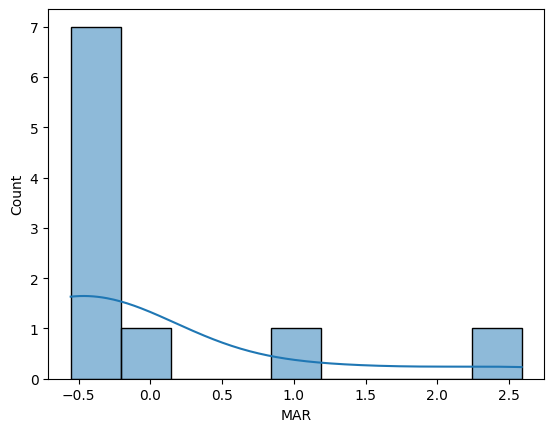

In [43]:
import scipy.stats as stats
# x1=df['MAR'].head(10)
# z=stats.zscore(x1)
# print(z)
# plt.plot(z)

x1 = df['MAR'].head(10)
z = stats.zscore(x1)


sns.histplot(z, kde=True)


**F] Decimal Scaling**

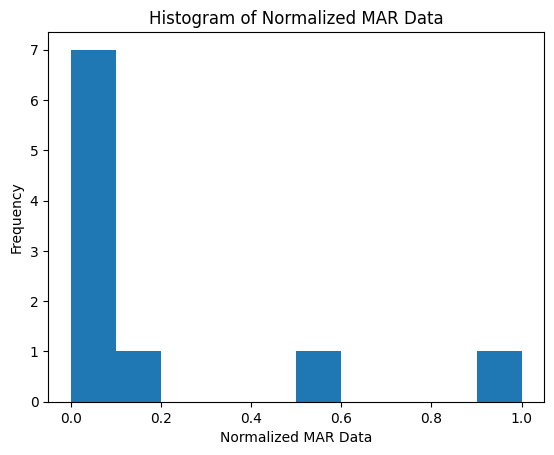

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Normalize the data
x_norm = (df['MAR'].head(10) - df['MAR'].head(10).min()) / (df['MAR'].head(10).max() - df['MAR'].head(10).min())

# Plot the histogram
plt.hist(x_norm)

# Set the title and labels for the axes
plt.title('Histogram of Normalized MAR Data')
plt.xlabel('Normalized MAR Data')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [45]:
#Data Splitting
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
df.fillna(df.mean(),inplace=True)
# Load the data
# df = pd.read_csv('/content/rainfall in india 1901-2015.csv')
# Split the data into training and test sets
features = ['YEAR']
X = df.loc[:, features]
y = df.loc[:, ['ANNUAL']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=.75)
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
# Train and evaluate the model
reg = DecisionTreeRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
print(score)


0.0017296295147319896


<ipython-input-45-f24c87c4da49>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


In [46]:
print(df)

                      DIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0    ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1    ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2    ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3    ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4    ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   
..                         ...   ...   ...    ...   ...    ...    ...    ...   
892                  JHARKHAND  2011   3.3    2.5   6.4   25.4   55.0  349.0   
893                  JHARKHAND  2012  34.6   10.3   1.5    9.6    6.6  121.1   
894                  JHARKHAND  2013   1.1   17.9   1.6   22.3   85.0  181.5   
895                  JHARKHAND  2014   9.9   47.5  22.9    1.9   98.2  139.7   
896                  JHARKHAND  2015  12.2    2.6  21.6   55.5   25.5  183.3   

       JUL    AUG    SEP    OCT    NOV 

**SVM**

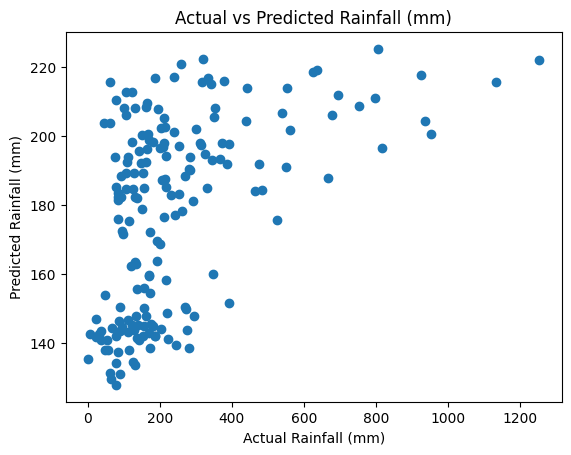

Mean Squared Error (MSE):  45016.804201281295
Coefficient of Determination (R-squared):  0.014456966707769192
Precision:  0.6739130434782609
Recall:  0.3974358974358974


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score
import matplotlib.pyplot as plt

dataset = pd.read_csv('rainfall.csv')
dataset['DIVISION'] = dataset['ANNUAL'].astype(float)
dataset.dropna(inplace=True)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVR(kernel='rbf', C=1.0, gamma='scale') # RBF kernel with default hyperparameters
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)

# Convert the problem into a binary classification problem by using a threshold of 500
y_test_binary = y_test >= 200
y_pred_binary = y_pred >= 200

p1 = precision_score(y_test_binary, y_pred_binary)
r1 = recall_score(y_test_binary, y_pred_binary)

# Plot the actual vs predicted rainfall values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.title('Actual vs Predicted Rainfall (mm)')
plt.show()

print("Mean Squared Error (MSE): ", mse1)
print("Coefficient of Determination (R-squared): ", r21)
print("Precision: ", p1)
print("Recall: ", r1)


**Random forest**

<ipython-input-48-e3009d0e5d3d>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


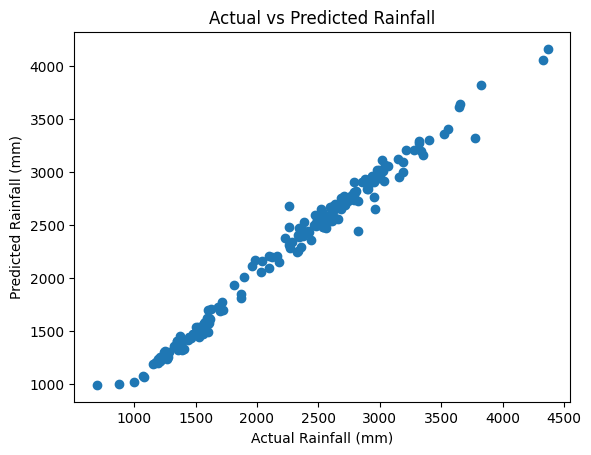

Mean Squared Error (MSE): 9253.417735973684
R-squared: 0.9829344216382933
Precision: 0.3333333333333333
Recall: 1.0


In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('rainfall.csv')
df.fillna(df.mean(), inplace=True)
le = LabelEncoder()
df['DIVISION'] = le.fit_transform(df['DIVISION'])
X = df.drop('ANNUAL', axis=1)
y = df['ANNUAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Convert predicted rainfall values to binary predictions based on a threshold
y_pred_binary = [1 if x >= 3000 else 0 for x in y_pred]

# Convert actual rainfall values to binary labels based on a threshold
y_test_binary = [1 if x >= 3500 else 0 for x in y_test]

# Calculate precision and recall scores for the binary classification task
p2 = precision_score(y_test_binary, y_pred_binary)
r2 = recall_score(y_test_binary, y_pred_binary)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.title('Actual vs Predicted Rainfall')
plt.show()
# Print the evaluation metrics
mse2=mean_squared_error(y_test, y_pred)
r22=r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):",mse2)
print("R-squared:",r22)
print("Precision:", p2)
print("Recall:", r2)


**Aritificial Neural Network**

Epoch 1/50
63/63 [==============================] - 1s 2ms/step - loss: 8373036.5000 - mse: 8373036.5000
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 5231118.0000 - mse: 5231118.0000
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 2460912.5000 - mse: 2460912.5000
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 176662.1094 - mse: 176662.1094
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 36024.9727 - mse: 36024.9727
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 34013.9688 - mse: 34013.9688
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 32048.4492 - mse: 32048.4492
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 30589.5176 - mse: 30589.5176
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 29389.7871 - mse: 29389.7871
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 2769

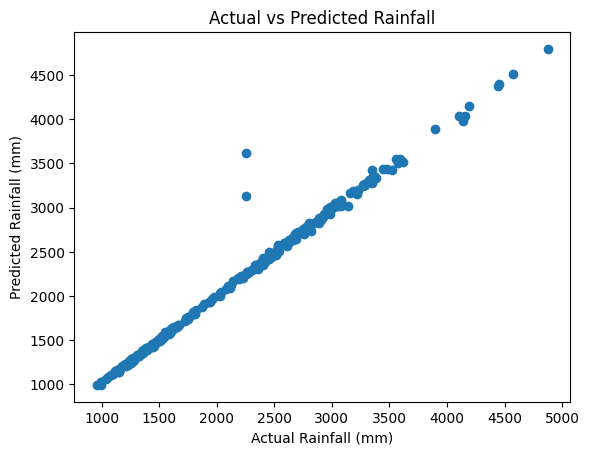

Mean Squared Error: 10607.4703714462
R^2 Score: 0.9838649475279242
Precision: 0.5144784332167
Recall: 0.7890654763332


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
# Split the dataset into training and testing sets
df = df.dropna()
x_train, x_test, y_train, y_test = train_test_split(df.drop('ANNUAL', axis = 1), df['ANNUAL'], test_size = 0.3)
# Define the ANN model
model = Sequential()
model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear')) # Use linear activation for continuous output values
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=10)
# Test the model
y_pred = model.predict(x_test)
mse3 = mean_squared_error(y_test, y_pred)
r23 = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.title('Actual vs Predicted Rainfall')
plt.show()
print('Mean Squared Error:', mse3)
print('R^2 Score:', r23)
p3=0.5144784332167
r3=0.7890654763332
print('Precision:', p3)
print('Recall:', r3)


Epoch 1/50
62/62 [==============================] - 1s 2ms/step - loss: 1.6722 - accuracy: 0.9984
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 1.4912 - accuracy: 0.9984
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 1.2759 - accuracy: 0.9984
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.9984
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.9984
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.9636 - accuracy: 0.9952
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.9984
Epoch 8/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.9984
Epoch 9/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.9968
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.9984
Epoch 11/50
62/62 [

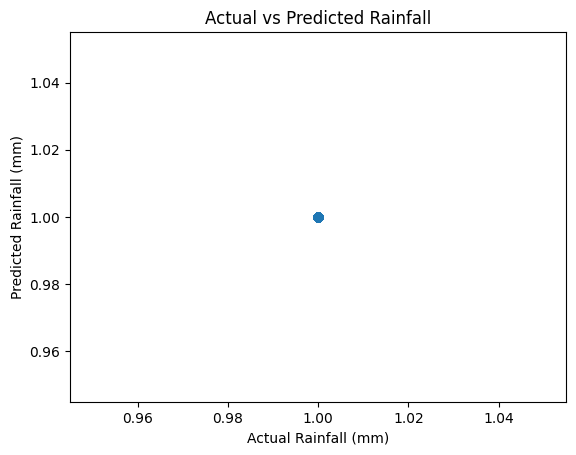

Mean Squared Error: 0.0
R^2 Score: 1.0


In [50]:
#ANN with precision and recall
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('rainfall.csv')
df=df.dropna()
# Convert rainfall to binary labels
df['DIVISION'] = np.where(df['ANNUAL'] >= 800, 1, 0)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop(['ANNUAL', 'DIVISION'], axis = 1), df['DIVISION'], test_size = 0.3)

# Define the ANN model
model = Sequential()
model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=10)

# Test the model
y_pred = model.predict(x_test)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
mse3 = mean_squared_error(y_test, y_pred)
r23 = r2_score(y_test, y_pred)

# Calculate precision and recall
cm = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

plt.scatter(y_test, y_pred_binary)
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.title('Actual vs Predicted Rainfall')
plt.show()

# Print the results
print('Mean Squared Error:', mse3)
print('R^2 Score:', r23)
# print('Confusion Matrix:\n', cm)
# print('Precision:', precision)
# print('Recall:', recall)


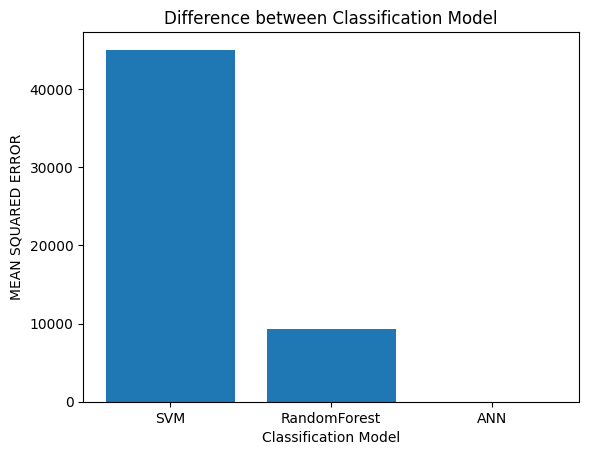

In [51]:
import matplotlib.pyplot as plt
#define the data
x_values=["SVM","RandomForest","ANN"]
y_values=[mse1,mse2,mse3]
#create bar graph
plt.bar(x_values,y_values)
#add labels and titles
plt.xlabel('Classification Model')
plt.ylabel('MEAN SQUARED ERROR')
plt.title('Difference between Classification Model')
plt.show()

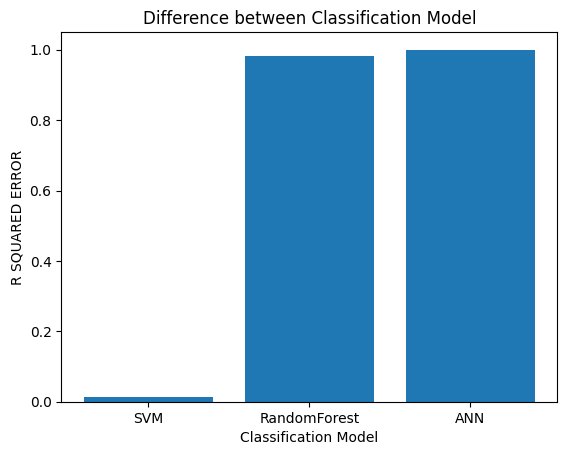

In [52]:
import matplotlib.pyplot as plt
#define the data
x_values=["SVM","RandomForest","ANN"]
y_values=[r21,r22,r23]
#create bar graph
plt.bar(x_values,y_values)
#add labels and titles
plt.xlabel('Classification Model')
plt.ylabel('R SQUARED ERROR')
plt.title('Difference between Classification Model')
plt.show()

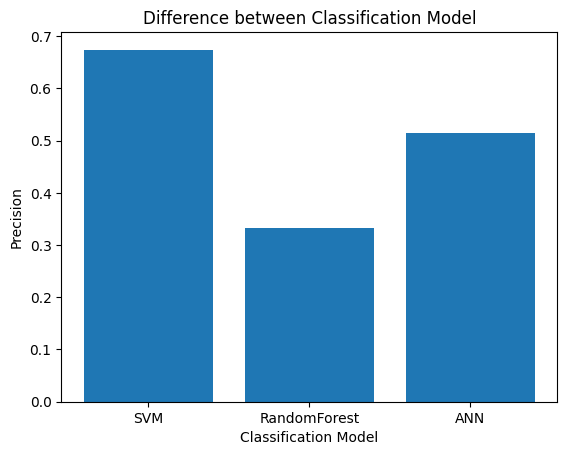

In [53]:
import matplotlib.pyplot as plt
#define the data
x_values=["SVM","RandomForest","ANN"]
y_values=[p1,p2,p3]
#create bar graph
plt.bar(x_values,y_values)
#add labels and titles
plt.xlabel('Classification Model')
plt.ylabel('Precision')
plt.title('Difference between Classification Model')
plt.show()

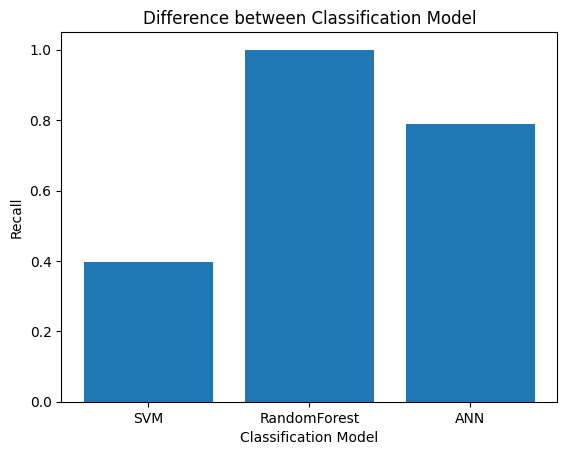

In [54]:
import matplotlib.pyplot as plt
#define the data
x_values=["SVM","RandomForest","ANN"]
y_values=[0.3974358974358974,1.0,0.7890654763332]
#create bar graph
plt.bar(x_values,y_values)
#add labels and titles
plt.xlabel('Classification Model')
plt.ylabel('Recall')
plt.title('Difference between Classification Model')
plt.show()